In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sklearn.__version__

'1.3.0'

In [6]:
df1= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\Cylist Data Project\\202301 tripdata.csv")
df2= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\Cylist Data Project\\202302-divvy-tripdata.csv")
df3= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\Cylist Data Project\\202303-divvy-tripdata.csv")
df4= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\Cylist Data Project\\202304-divvy-tripdata.csv")
df5= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\Cylist Data Project\\202305-divvy-tripdata.csv")
df6= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\Cylist Data Project\\202306-divvy-tripdata.csv")
df7= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\Cylist Data Project\\202307-divvy-tripdata.csv")

In [7]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [8]:
dataframes_list = [df1, df2, df3, df4, df5, df6, df7]

# Concatenate these DataFrames vertically into one combined DataFrame
df = pd.concat(dataframes_list, axis=0, ignore_index=True)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158109 entries, 0 to 3158108
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 313.2+ MB


In [10]:
df.shape

(3158109, 13)

In [11]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,3.158109e+06,3.158109e+06,3.154395e+06,3.154395e+06
mean,4.190313e+01,-8.764710e+01,4.190346e+01,-8.764723e+01
std,4.495856e-02,2.758371e-02,5.608909e-02,7.508553e-02
min,4.164000e+01,-8.792000e+01,0.000000e+00,-8.816000e+01
25%,4.188105e+01,-8.766000e+01,4.188132e+01,-8.766027e+01
50%,4.189993e+01,-8.764378e+01,4.190000e+01,-8.764410e+01
75%,4.193000e+01,-8.762991e+01,4.193000e+01,-8.762991e+01
max,4.207000e+01,-8.752000e+01,4.218000e+01,0.000000e+00


# Let check for MISSING VALUE

In [12]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    480360
start_station_id      480492
end_station_name      511267
end_station_id        511408
start_lat                  0
start_lng                  0
end_lat                 3714
end_lng                 3714
member_casual              0
dtype: int64

In [13]:
#dropping missing values
# List of columns to replace missing values with 'null'
columns_to_replace = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']

# Replace missing values that are not numerical with 'null'
df[columns_to_replace] = df[columns_to_replace].fillna('null')
df.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
start_station_id         0
end_station_name         0
end_station_id           0
start_lat                0
start_lng                0
end_lat               3714
end_lng               3714
member_casual            0
dtype: int64

In [14]:
#let drop na for the remaining numerical value
df.dropna()
df.shape

(3158109, 13)

# Adding New Columns For Ride Length

In [15]:
# Convert 'started_at' and 'ended_at' columns to datetime objects
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate ride length in minutes and add it as a new column 'ride_length_minutes'
df['ride_length_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158109 entries, 0 to 3158108
Data columns (total 14 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ride_id              object        
 1   rideable_type        object        
 2   started_at           datetime64[ns]
 3   ended_at             datetime64[ns]
 4   start_station_name   object        
 5   start_station_id     object        
 6   end_station_name     object        
 7   end_station_id       object        
 8   start_lat            float64       
 9   start_lng            float64       
 10  end_lat              float64       
 11  end_lng              float64       
 12  member_casual        object        
 13  ride_length_minutes  float64       
dtypes: datetime64[ns](2), float64(5), object(7)
memory usage: 337.3+ MB


# Adding a New Column for DAY OF THE WEEK

In [17]:
# Calculate day of the week (1 = Sunday, 7 = Saturday) and add it as a new column 'day_of_week'
df['day_of_week'] = df['started_at'].dt.weekday + 1 

# Format 'day_of_week' column as a number with no decimals
df['day_of_week'] = df['day_of_week'].astype(int)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_minutes,day_of_week
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,10.850000,6
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.483333,2
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,13.233333,1
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.766667,7
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,15.316667,4


calculating the day of the week using .dt.weekday, where Monday is 0 and Sunday is 6. To match your desired format (1 = Sunday, 7 = Saturday), I add 1 to the result.

# DESCRIPTIVE ANALYSIS

In [18]:
# 1. Summary Statistics
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length_minutes,day_of_week
count,3158109,3158109,3.158109e+06,3.158109e+06,3.154395e+06,3.154395e+06,3.158109e+06,3.158109e+06
mean,2023-05-16 21:37:34.015745536,2023-05-16 21:56:02.718085376,4.190313e+01,-8.764710e+01,4.190346e+01,-8.764723e+01,1.847837e+01,4.021283e+00
min,2023-01-01 00:01:58,2023-01-01 00:02:41,4.164000e+01,-8.792000e+01,0.000000e+00,-8.816000e+01,-6.025000e+01,1.000000e+00
25%,2023-04-12 16:12:44,2023-04-12 16:29:23,4.188105e+01,-8.766000e+01,4.188132e+01,-8.766027e+01,5.400000e+00,2.000000e+00
50%,2023-05-28 09:06:45,2023-05-28 09:30:04,4.189993e+01,-8.764378e+01,4.190000e+01,-8.764410e+01,9.600000e+00,4.000000e+00
75%,2023-06-30 07:41:51,2023-06-30 07:57:28,4.193000e+01,-8.762991e+01,4.193000e+01,-8.762991e+01,1.720000e+01,6.000000e+00
max,2023-07-31 23:59:56,2023-08-12 04:53:41,4.207000e+01,-8.752000e+01,4.218000e+01,0.000000e+00,5.146140e+04,7.000000e+00
std,NaN,NaN,4.495856e-02,2.758371e-02,5.608909e-02,7.508553e-02,1.642573e+02,1.963941e+00


In [19]:
# Counting of unique values in categorical columns
df.select_dtypes(include=['object']).nunique()

ride_id               3158109
rideable_type               3
start_station_name       1497
start_station_id         1420
end_station_name         1510
end_station_id           1432
member_casual               2
dtype: int64

In [24]:
# Frequency distribution of 'rideable_type' column
df['rideable_type'].value_counts()

rideable_type
electric_bike    1693205
classic_bike     1402574
docked_bike        62330
Name: count, dtype: int64

In [23]:
# let do a basic statistics for ride length in minutes
df['ride_length_minutes'].describe()

count    3.158109e+06
mean     1.847837e+01
std      1.642573e+02
min     -6.025000e+01
25%      5.400000e+00
50%      9.600000e+00
75%      1.720000e+01
max      5.146140e+04
Name: ride_length_minutes, dtype: float64

In [25]:
# let get the count of rides per day of the week
day_names = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}

# Count the number of rides per day of the week and sort by day number
rides_per_day_of_week = df['day_of_week'].value_counts().sort_index()

# Rename the index (day numbers) with day names
rides_per_day_of_week.index = rides_per_day_of_week.index.map(day_names)
print("Rides per Day of the Week:")
rides_per_day_of_week

Rides per Day of the Week:


day_of_week
Sunday       424034
Monday       448629
Tuesday      444648
Wednesday    472644
Thursday     464901
Friday       493439
Saturday     409814
Name: count, dtype: int64

It shows that there are more riding on Friday follows sunday compare to other days of the week

# the longest ride length

In [26]:
#let get the maxium ride length
# Find the longest ride length in minutes
longest_ride_minutes = df['ride_length_minutes'].max()

# Convert the longest ride length to hours
longest_ride_hours = longest_ride_minutes / 60


# Print the results
print("Longest Ride Length in Minutes:", longest_ride_minutes)
print("Longest Ride Length in Hours:", longest_ride_hours)
# Find the row(s) with the longest ride length
df[df['ride_length_minutes'] == longest_ride_minutes]

Longest Ride Length in Minutes: 51461.4
Longest Ride Length in Hours: 857.69


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_minutes,day_of_week
2996864,CFB4246E9FAB59DA,docked_bike,2023-07-03 10:49:37,2023-08-08 04:31:01,Wabash Ave & Wacker Pl,TA1307000131,null,null,41.886875,-87.62603,NaN,NaN,casual,51461.4,1


It is shows that the member that has the longest ride is a casual with docked_bike at Wabash Ave & Wacker Pl. This occur on forst day of the week

# Exploration Analysis

# Calculate the average ride_length for members and casual riders

In [27]:

# First have to create a pivot table to calculate the average ride_length for members and casual riders
pivot_table_option1 = pd.pivot_table(df, values='ride_length_minutes', index='member_casual', aggfunc='mean')

# Rename the columns for clarity
pivot_table_option1.columns = ['Average Ride Length (Minutes)']

print("Option 1: Average Ride Length for Members and Casual Riders")
pivot_table_option1

Option 1: Average Ride Length for Members and Casual Riders


,Average Ride Length (Minutes)
member_casual,
casual,28.960006
member,12.399247


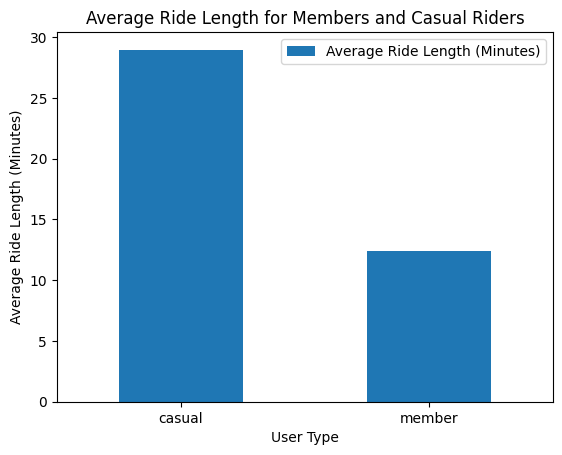

In [28]:
pivot_table_option1.plot(kind='bar', title='Average Ride Length for Members and Casual Riders')
plt.xlabel('User Type')
plt.ylabel('Average Ride Length (Minutes)')
plt.xticks(rotation=0)
plt.show()

Casual spend more time riding than members

# Calculate the average ride_length for users by day_of_week.

In [29]:
# Create a pivot table to calculate the average ride_length for users by day_of_week
pivot_table_option2 = pd.pivot_table(df, values='ride_length_minutes', index='member_casual', columns='day_of_week', aggfunc='mean')

# Rename the columns to day names for clarity
day_names = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}
pivot_table_option2.columns = [day_names[col] for col in pivot_table_option2.columns]
pivot_table_option2

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
member_casual,,,,,,,
casual,28.455910,26.456018,25.417253,25.086874,27.454304,33.338530,32.845633
member,11.892287,11.939471,11.655130,11.850879,12.257561,13.981601,13.837573


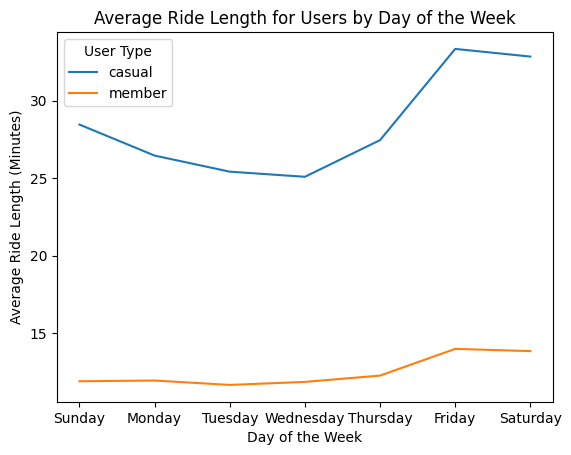

In [30]:
pivot_table_option2.T.plot(kind='line', title='Average Ride Length for Users by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length (Minutes)')
plt.legend(title='User Type')
plt.xticks(rotation=0)
plt.show()

Analysing the average ride perday of the week shows that casual ride more than the members

# Calculate the number of rides for users by day_of_week.

In [31]:
# Create a pivot table to calculate the number of rides for users by day_of_week
pivot_table_option3 = pd.pivot_table(df, values='ride_id', index='member_casual', columns='day_of_week', aggfunc='count')

# Rename the columns to day names for clarity
pivot_table_option3.columns = [day_names[col] for col in pivot_table_option3.columns]
pivot_table_option3

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
member_casual,,,,,,,
casual,142070,138376,133369,152316,174202,233254,185692
member,281964,310253,311279,320328,290699,260185,224122


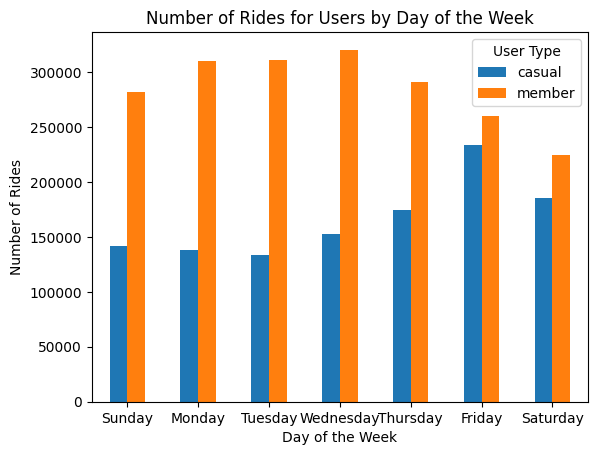

In [32]:
pivot_table_option3.T.plot(kind='bar', title='Number of Rides for Users by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.xticks(rotation=0)
plt.show()

# Visualising the number of ride overtime

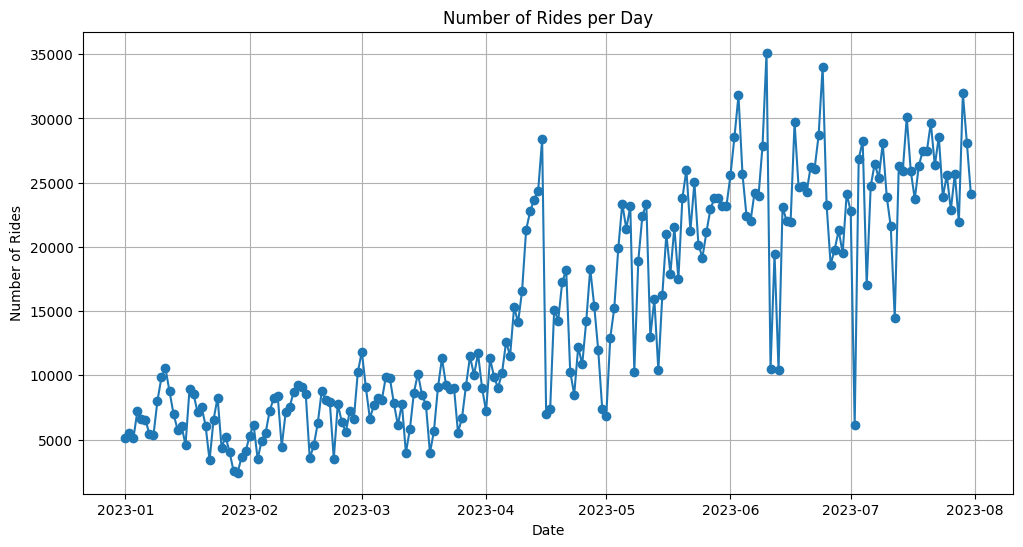

In [33]:
# Convert 'started_at' column to datetime
df['started_at'] = pd.to_datetime(df['started_at'])

# Set 'started_at' as the DataFrame's index
df.set_index('started_at', inplace=True)

# Resample the data by day and count the number of rides per day
rides_per_day = df['ride_id'].resample('D').count()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(rides_per_day.index, rides_per_day.values, marker='o', linestyle='-')
plt.title('Number of Rides per Day')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

# Analysing Rideable type

In [35]:
#let check the values counts
rideable_type_counts = df['rideable_type'].value_counts()
print(rideable_type_counts)

rideable_type
electric_bike    1693205
classic_bike     1402574
docked_bike        62330
Name: count, dtype: int64


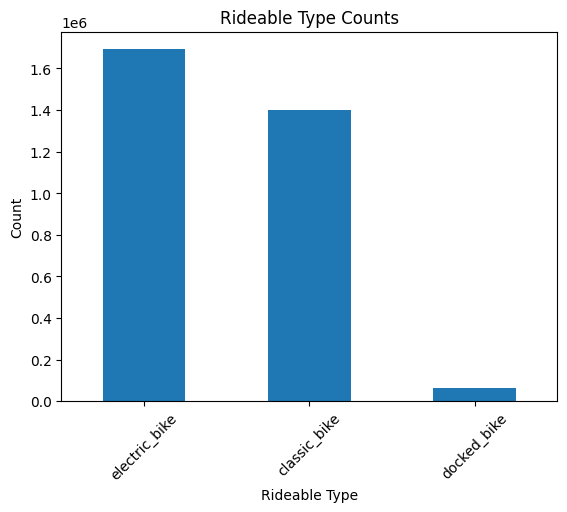

In [36]:
import matplotlib.pyplot as plt

# Plot a bar chart for rideable type counts
rideable_type_counts.plot(kind='bar', title='Rideable Type Counts')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

There are fews of docked type bike

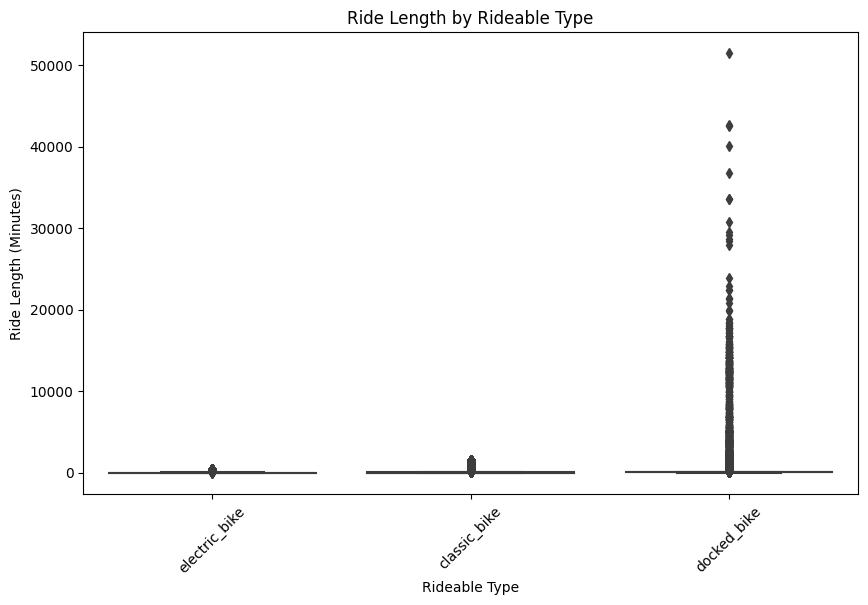

In [37]:
import seaborn as sns

# Plot a box plot to visualize ride length by rideable type
plt.figure(figsize=(10, 6))
sns.boxplot(x='rideable_type', y='ride_length_minutes', data=df)
plt.title('Ride Length by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Ride Length (Minutes)')
plt.xticks(rotation=45)
plt.show()

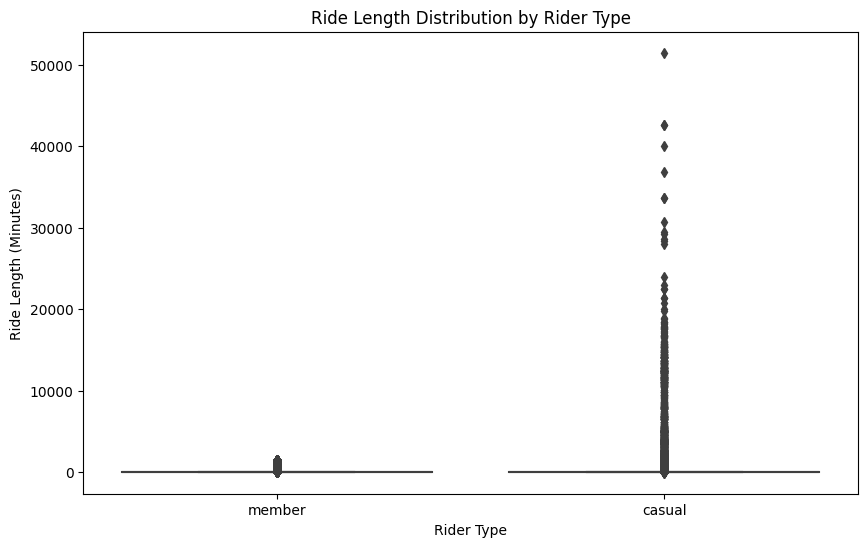

In [39]:
# Example: Box plot to compare ride length distribution between casual and member riders
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='member_casual', y='ride_length_minutes', data=df)
plt.title('Ride Length Distribution by Rider Type')
plt.xlabel('Rider Type')
plt.ylabel('Ride Length (Minutes)')
plt.show()

# Analysing Member and Casual Trend

3158109


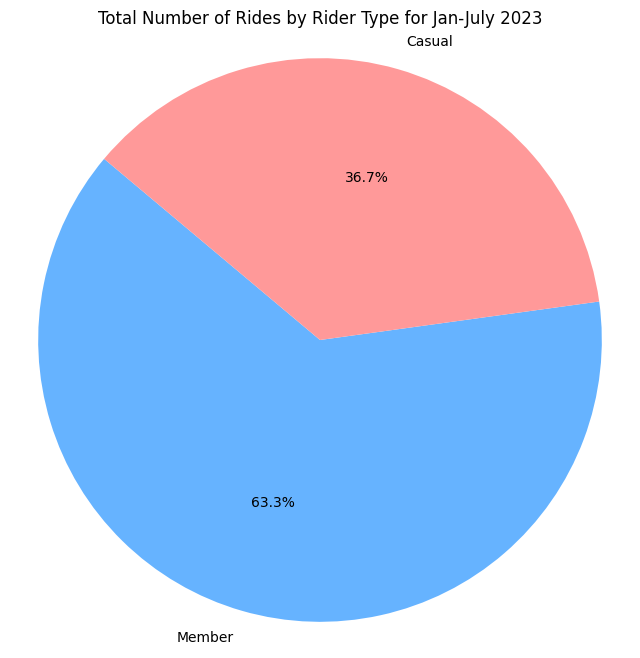

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Calculate the total number of rides for members and casual riders
total_rides = len(df)
total_member_rides = len(df[df['member_casual'] == 'member'])
total_casual_rides = len(df[df['member_casual'] == 'casual'])

# Create a pie chart
labels = ['Member', 'Casual']
sizes = [total_member_rides, total_casual_rides]
colors = ['#66b3ff', '#ff9999']  # Blue for Member, Red for Casual

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Number of Rides by Rider Type for Jan-July 2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
print(total_rides)
plt.show()

<Figure size 1200x600 with 0 Axes>

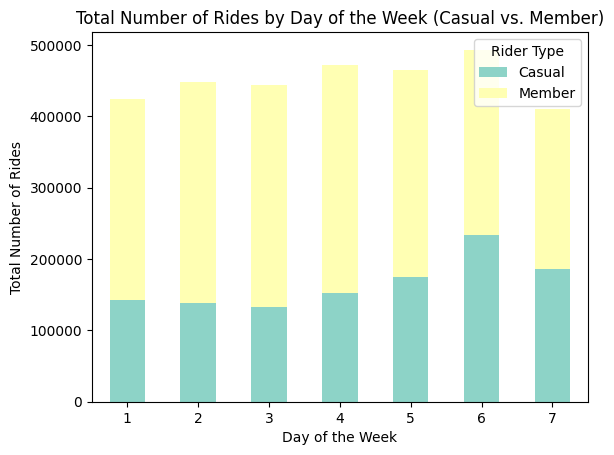

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Create a pivot table to calculate the total number of rides by day_of_week and member_casual
pivot_table = df.pivot_table(index='day_of_week', columns='member_casual', values='ride_id', aggfunc='count')

# Plot a stacked bar chart
plt.figure(figsize=(12, 6))
sns.set_palette('Set3')  # Set color palette
pivot_table.plot(kind='bar', stacked=True)
plt.title('Total Number of Rides by Day of the Week (Casual vs. Member)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Rides')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Rider Type', labels=['Casual', 'Member'])
plt.show()

In [41]:
# Specify the file path where you want to save the CSV file
file_path = "C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\Cylist Data Project\\Clean2023data.csv"
# Export the DataFrame to a CSV file
df.to_csv(file_path, index=False)  # Use index=False to exclude the index column from the CSV file

print(f"DataFrame has been exported to {file_path}")

DataFrame has been exported to C:\Users\TOJMARK LTD\DATA SCIENCE PROJECT\Cylist Data Project\Clean2023data.csv


In [48]:
df.head()

,ride_id,rideable_type,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_minutes,day_of_week
started_at,,,,,,,,,,,,,,
2023-01-21 20:05:42,F96D5A74A3E41399,electric_bike,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,10.850000,6
2023-01-10 15:37:36,13CB7EB698CEDB88,classic_bike,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.483333,2
2023-01-02 07:51:57,BD88A2E670661CE5,electric_bike,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,13.233333,1
2023-01-22 10:52:58,C90792D034FED968,classic_bike,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.766667,7
2023-01-12 13:58:01,3397017529188E8A,classic_bike,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,15.316667,4
